In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

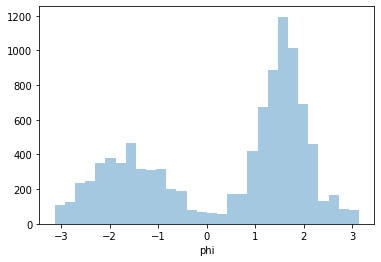

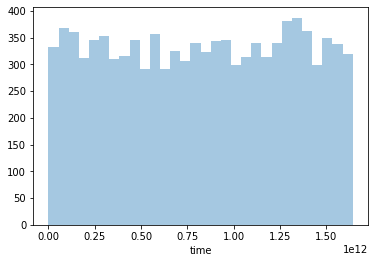

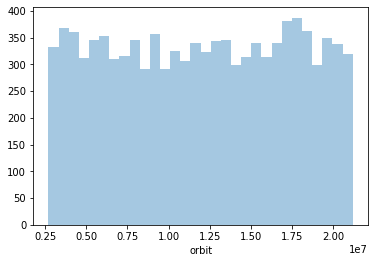

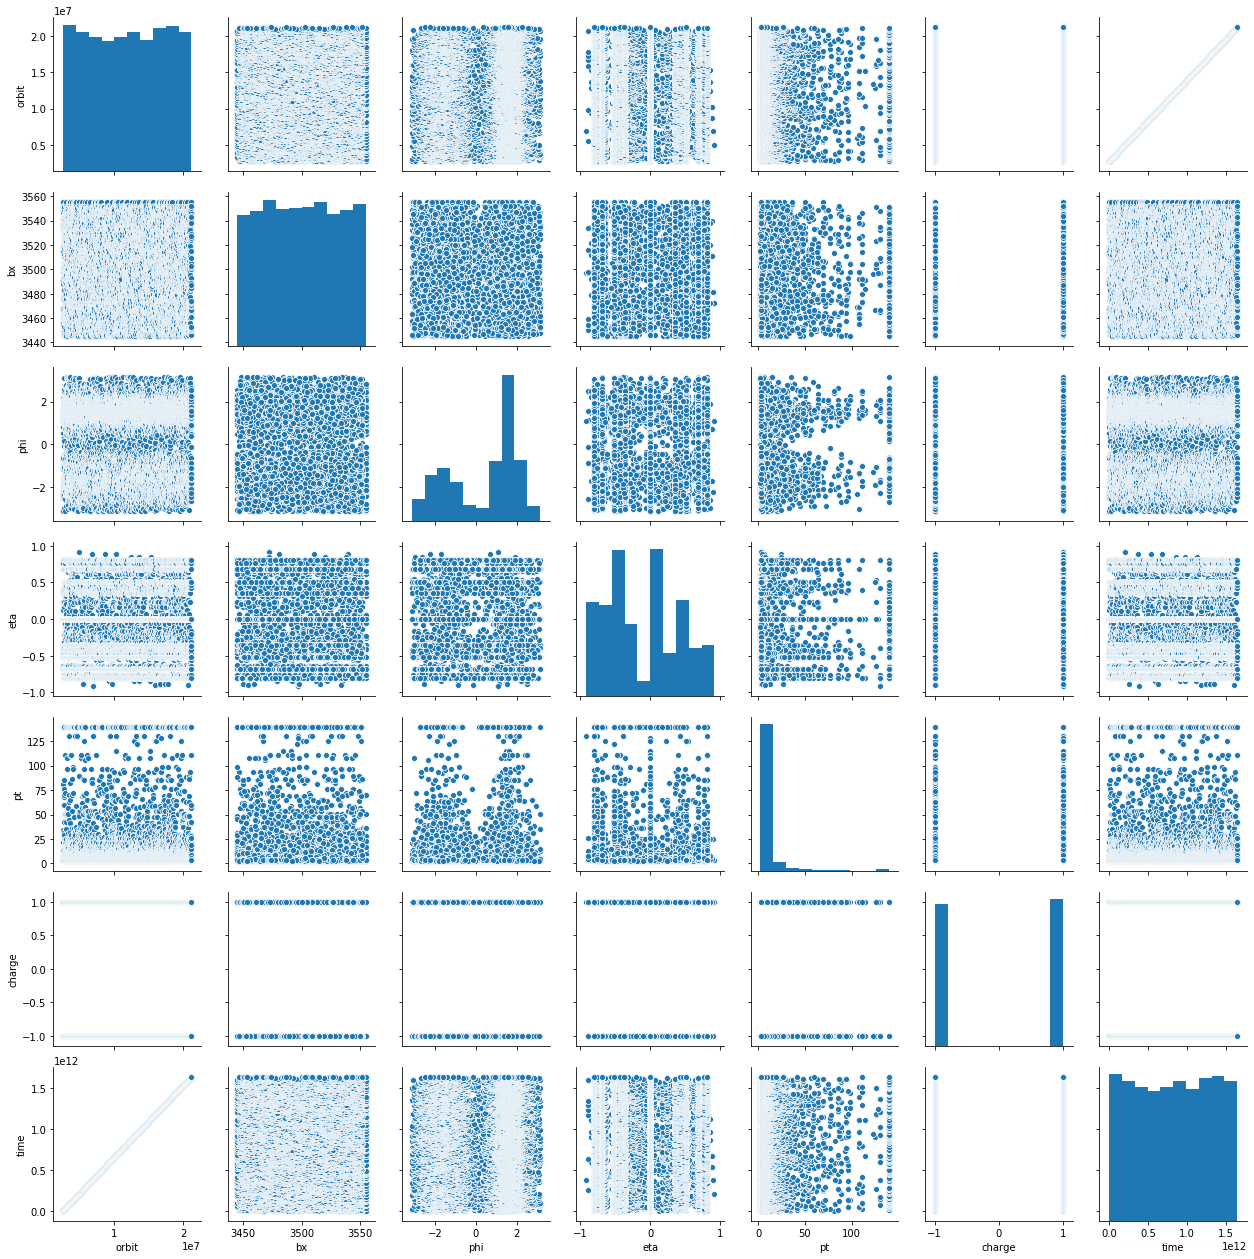

In [3]:
df=pd.read_csv('scout_326790_000000_trunc.csv')
df['time']=(df['orbit']-df['orbit'][0])*88924.5+(df['bx']-df['bx'][0])*24.95
df1=df.shift(1)
df.head()
sns.distplot(df['phi'], kde=False, bins=30)
plt.show()
sns.distplot(df['time'], kde=False,  bins=30)
plt.show()
sns.distplot(df['orbit'],kde=False, bins=30)
plt.show()
sns.pairplot(df)
plt.show()

In [9]:
# How many time/orbit slices have a certain number of muons
bins=int(0.003*len(df)) #If 30 bins are good for 10000 data then int(0.003*len(df)) bins are good for len(df) data.
muons=np.zeros(bins)
sclice=np.array([df['orbit'].min()+ ((df['orbit'].max()-df['orbit'].min())/bins)*i for i in range(bins+1)])
for orbit in df['orbit']:
    for i in range(bins):
        if(orbit > sclice[i] and orbit < sclice[i+1]):
            muons[i]+=1



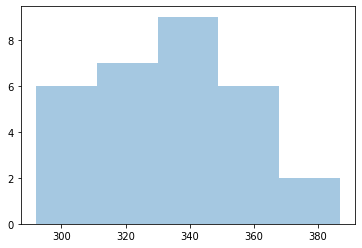

In [5]:
sns.distplot(muons, kde=False)# How many time/orbit slices have a certain number of muons (PLOT)

30